In [1]:
from ortools.linear_solver import pywraplp

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import combinations
import time

In [3]:
number_tickets = 10
seating_rows = 20
seating_columns = 20
number_seats = seating_rows * seating_columns
seat_depth = 0.5
seat_depth_gap = 0.2
seat_width = 0.5
seat_width_gap = 0.2

In [4]:
x_seats = np.array( [ (i % seating_columns) * (seat_width + seat_width_gap) + (seat_width / 2) for i in range(number_seats) ] )

In [5]:
y_seats = np.array( [ (i // seating_columns) * (seat_depth + seat_depth_gap) + (seat_depth / 2) for i in range(number_seats) ] )

In [6]:
#ticket_size = np.random.randint(low =1, high = 10, size = number_tickets)
ticket_size = np.ones(number_tickets)

In [7]:
ticket_size

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
def main():
    # Data
    
        
    
    # Solver
    # Create the mip solver with the CBC backend.
    solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.
    x = {}
    for i in range(number_seats):
        x[i] = solver.IntVar(0, 1, '')

    # Constraints
    # Each ticekt is assigned to only one seat max
    """
    for i in range(number_seats):
        solver.Add(solver.Sum([x[i, j] for j in range(number_tickets)]) <= 1)
    
    for j in range(number_tickets):
        solver.Add(solver.Sum([x[i, j] for i in range(number_seats)]) <= 1)
    """    
    # seating distance maintained
    """
    for m, n in combinations(range(number_tickets), 2):
        solver.Add(
                    (
                       ((solver.Sum([ x[i,m] * x_seats[i] for i in range(number_seats)]) 
                       - solver.Sum([ x[i,n] * x_seats[i] for i in range(number_seats)]) ) *  # change to square or do fancy stuff
                        (solver.Sum([ x[i,m] * x_seats[i] for i in range(number_seats)]) 
                       - solver.Sum([ x[i,n] * x_seats[i] for i in range(number_seats)]) ))
                        +
                        ((solver.Sum([ x[i,m] * y_seats[i] for i in range(number_seats)]) 
                       - solver.Sum([ x[i,n] * y_seats[i] for i in range(number_seats)]) ) * 
                        (solver.Sum([ x[i,m] * y_seats[i] for i in range(number_seats)]) 
                       - solver.Sum([ x[i,n] * y_seats[i] for i in range(number_seats)]) ))
                        
                    ) >= 4
                )
    """
    """
    for i in range(number_seats - 3):
        for j in range(number_tickets - 3):
            #solver.Add(solver.Sum([ x[p,q] for p in range(i, i+3) for q in range(j, j+3)]) <= 1)
            solver.Add(solver.Sum([ x[p+q*seating_rows,j] for p in range(i, i+3) for q in range(0, 3)]) <= 1)
    """
    """
    for a in range(seating_rows - 2):
        for b in range(seating_columns - 2):
            first_seat_num = a*seating_columns + b
            seat_nums = [first_seat_num + y + z*seating_columns for y in range(0,3) for z in range(0,3)]
            solver.Add(solver.Sum([x[p,q] for p in seat_nums for q in range(number_tickets)])<=1)
    """
    """
    for a, b in combinations(range(number_seats), 2):
        if (x_seats[a] - x_seats[b])**2 + (y_seats[a] - y_seats[b])**2 < 4:
            solver.Add(solver.Sum([ x[a,j] + x[b,j] for j in range(number_tickets)]) <= 1)

    """
    for a, b in combinations(range(number_seats), 2):
        if (x_seats[a] - x_seats[b])**2 + (y_seats[a] - y_seats[b])**2 < 4:
            solver.Add(solver.Sum([ x[a] , x[b] ]) <= 1 )
    
    
    # Objective
    objective_terms = []
    for i in range(number_seats):
        objective_terms.append(x[i])
    solver.Maximize(solver.Sum(objective_terms))

    # Solve
    status = solver.Solve()
    
    #sol_matrix
    soln_matrix = np.zeros((seating_rows, seating_columns))
    # Print solution.
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print('Total cost = ', solver.Objective().Value(), '\n')
        for i in range(seating_rows):
            for j in range(seating_columns):
                # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
                if x[i + j * seating_columns].solution_value() > 0.5:
                    #print('Worker %d assigned to task %d.  Cost = %d' %
                          #(i, j, costs[i][j]))
                        print(i,j)
                        soln_matrix[i,j] = 1# creating and returning the solution in grid / matrix form
        return(soln_matrix)
    else:
        return status


In [18]:
t1 = time.time()
soln = main()
t2 = time.time()
t2-t1

Total cost =  400.0 

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 1

0.3819770812988281

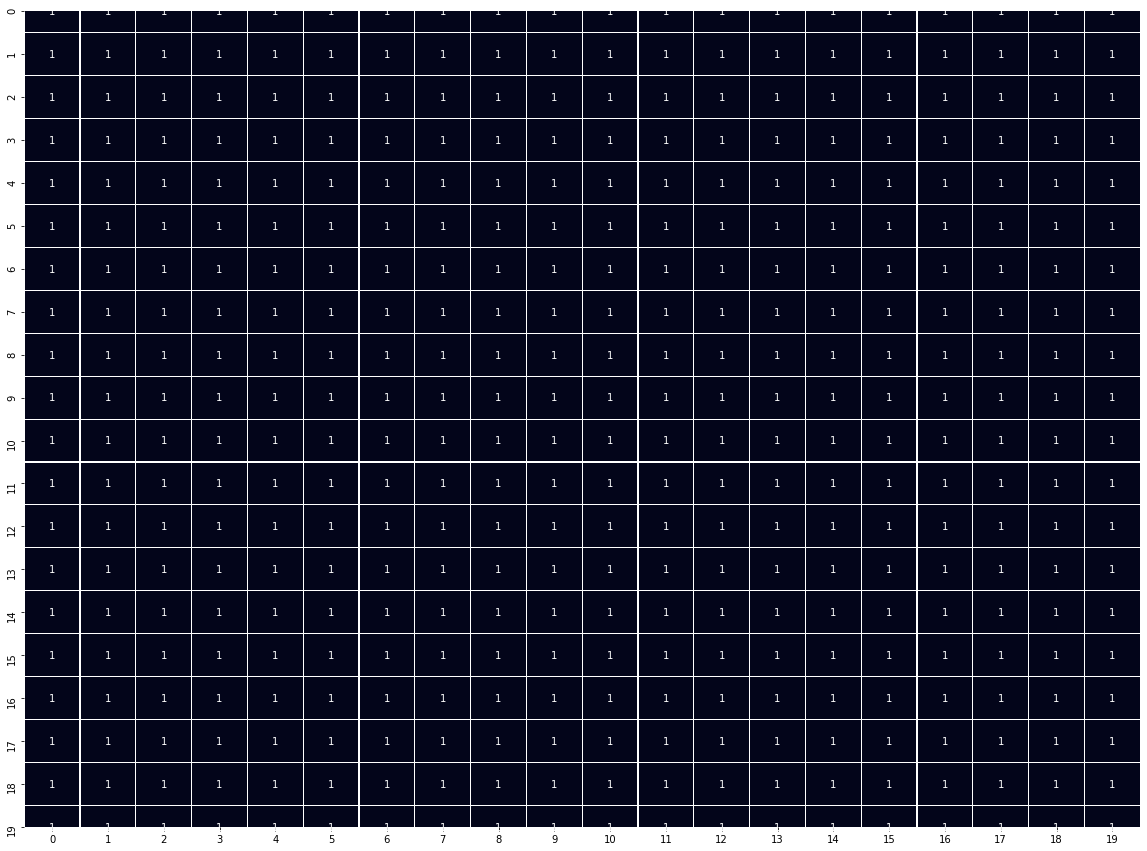

In [19]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(soln, linecolor = 'white', linewidths = 0.1, annot = True, ax = ax, cbar =False)